In [1]:
import sys
import cv2
import pandas as pd
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
from utils.datasets import get_labels
from utils.inference import detect_faces
from utils.inference import draw_text
from utils.inference import draw_bounding_box
from utils.inference import apply_offsets
from utils.inference import load_detection_model
from utils.inference import load_image
from utils.preprocessor import preprocess_input
import os

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import matplotlib.pyplot as plt

In [3]:
# parameters for loading data and images
image_path = '../../data/emoticImgs_six_classes/'
detection_model_path = '../../code/fer2013_file/haarcascade_frontalface_default.xml'
#emotion_model_path = 'fer2013_big_XCEPTION.54-0.66.hdf5'
emotion_model_path = 'Verena_mini_XCEPTION.09-0.38.hdf5'
#emotion_labels = get_labels('fer2013')
font = cv2.FONT_HERSHEY_SIMPLEX

# hyper-parameters for bounding boxes shape
emotion_offsets = (20, 40)
#emotion_offsets = (0, 0)

In [4]:
# loading models
face_detection = load_detection_model(detection_model_path)
emotion_classifier = load_model(emotion_model_path, compile=False)

# getting input model shapes for inference
emotion_target_size = emotion_classifier.input_shape[1:3]

In [5]:
#another dataset accuracy


In [5]:
new_faces=[]

for file in os.listdir(image_path):
    new_faces.append(cv2.imread(image_path+file,0))

In [6]:
len(new_faces)

196

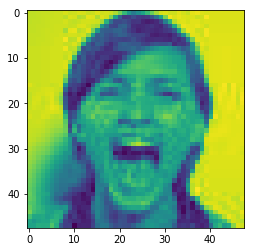

In [13]:
plt.imshow(new_faces[])

In [7]:
new_pred_emotions=[]
for gray_image in new_faces:
    #x1,x2,y1,y2 = 200, 450, 100, 380
    #gray_image = gray_image[y1:y2, x1:x2]
    gray_image = gray_image.reshape((48,48))
    gray_image = cv2.resize(gray_image.astype('uint8'), emotion_target_size)
    gray_image.astype('float32')
    gray_image = np.squeeze(gray_image)
    gray_image = preprocess_input(gray_image, True)
    gray_image = np.expand_dims(gray_image, 0)
    gray_image = np.expand_dims(gray_image, -1)
    emotion_label_arg = np.argmax(emotion_classifier.predict(gray_image))
    new_pred_emotions.append(emotion_label_arg)

In [8]:
#new_pred_emotions

In [4]:
new_dataset_labels=pd.read_csv('../../data/emotic_sixclasses_labels.csv',delimiter=',',header=None)

In [5]:
new_dataset_labels = new_dataset_labels.as_matrix()

In [6]:
new_dataset_labels = np.squeeze(new_dataset_labels)

In [7]:
len(new_dataset_labels)

196

In [8]:
temp_true_labels=[]
for x in new_dataset_labels:
    if x =='Angry':
        temp_true_labels.append(0)
    elif x == 'Disgust':
        temp_true_labels.append(1)
    elif x == 'Fear':
        temp_true_labels.append(2)
    elif x == 'Happy':
        temp_true_labels.append(3)
    elif x == 'Sad':
        temp_true_labels.append(4)
    else:
        temp_true_labels.append(5)


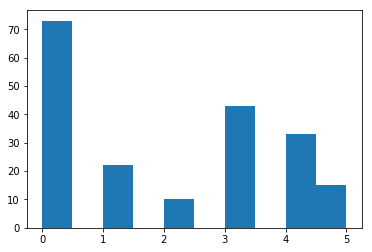

In [14]:
#temp_true_labels
plt.hist(np.array(temp_true_labels))
plt.show()

In [15]:
new_acc = 0
for index, i in enumerate(new_pred_emotions):
    if i == temp_true_labels[index]:
        new_acc = new_acc +1
    else:
        continue


In [16]:
new_acc /= len(new_faces)

In [17]:
print(new_acc) 

0.4642857142857143


In [19]:
# authors model to run the test and the acc is 22.95%
# after change the rest emotions into 'neutral' the accuracy is 22.22%

In [18]:
new_pred_emotions[:10]

[0, 0, 3, 3, 0, 0, 0, 0, 1, 3]

In [19]:
temp_true_labels[:10]

[0, 5, 3, 4, 0, 4, 0, 3, 5, 3]

In [21]:
#confusion matrix 
# x coordinate are predition emotion)
# y coordiante is truth emotions
confusion_matrix = np.zeros((6,6))
for pred, truth in zip(new_pred_emotions, temp_true_labels):
    confusion_matrix[truth, pred] += 1
matrix = np.zeros_like(confusion_matrix)
for index, i in enumerate(np.sum(confusion_matrix,axis=1)):
    matrix[index,:] = confusion_matrix[index,:]/i


In [22]:
matrix

array([[0.71232877, 0.04109589, 0.02739726, 0.20547945, 0.01369863,
        0.        ],
       [0.27272727, 0.22727273, 0.        , 0.31818182, 0.18181818,
        0.        ],
       [0.7       , 0.1       , 0.        , 0.2       , 0.        ,
        0.        ],
       [0.37209302, 0.        , 0.        , 0.60465116, 0.02325581,
        0.        ],
       [0.36363636, 0.        , 0.        , 0.39393939, 0.24242424,
        0.        ],
       [0.26666667, 0.06666667, 0.        , 0.53333333, 0.13333333,
        0.        ]])